<a href="https://colab.research.google.com/github/Yilder02/SyS_2025-1/blob/main/Parciales_SyS/Parcial%201_SyS/Punto_3__y_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Distancia Media Entre Dos Señales


* Señal 1: $x_1(t) = A \cos\left( \omega_0 t \right), \quad \omega_0 = \dfrac{2\pi}{T}$

* Señal 2: $x_2(t) =
\begin{cases}
1, & 0 \leq t < \dfrac{T}{4} \\
-1, & \dfrac{T}{4} \leq t < \dfrac{3T}{4} \\
1, & \dfrac{3T}{4} \leq t < T
\end{cases}$


In [1]:
import sympy as sp

# Definir variables
t, T, A = sp.symbols('t T A', real=True, positive=True)

# Definir omega_0
w0 = 2 * sp.pi / T

# x1(t)
x1 = A * sp.cos(w0 * t)

# x2(t) por tramos
x2_1 = 1     # 0 <= t < T/4
x2_2 = -1    # T/4 <= t < 3T/4
x2_3 = 1     # 3T/4 <= t < T

# |x1 - x2|^2 en cada tramo
e1 = (x1 - x2_1)**2
e2 = (x1 - x2_2)**2
e3 = (x1 - x2_3)**2

# Integrar en cada tramo
I1 = sp.integrate(e1, (t, 0, T/4))
I2 = sp.integrate(e2, (t, T/4, 3*T/4))
I3 = sp.integrate(e3, (t, 3*T/4, T))

# Sumar integrales
I_total = I1 + I2 + I3

# Dividir por T para obtener la distancia media
d = I_total / T

# Simplificar
d_simplificada = sp.simplify(d)

# Mostrar resultado
sp.pprint(d_simplificada)


 2          
A    4⋅A    
── - ─── + 1
2     π     


* **Respuesta: queda corroborado el resultado hecho a mano, ya que la distancia media entre las señales $x_1(t)$ y $x_2(t)$ me dio exactamente igual usando sympy.**

# 4. Cálculo y Análisis de Coeficientes de Fourier a partir de la Segunda Derivada de una Señal

* $c_n = \frac{1}{(t_i - t_f) n^2 \omega_0^2} \int_{t_i}^{t_f} x''(t) e^{-j n \omega_0 t} \, dt, \quad n \in \mathbb{Z}$

* calcular los coeficientes $a_n$ y $b_n$ desde
$x''(t) $ en la serie trigonometrica de Fourier



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definir intervalo y parámetros
ti = 0
tf = 2*np.pi
T = tf - ti
w0 = 2*np.pi / T

# Segunda derivada de la señal x(t) = sin(t) -> x''(t) = -sin(t)
def x_dd(t):
    return -np.sin(t)

# Intervalo de n
n_vals = np.arange(-5, 6)

# Calcular c_n
def compute_cn(n):
    if n == 0:
        return 0  # evitar división por cero
    integrand = lambda t: x_dd(t) * np.exp(-1j * n * w0 * t)
    integral, _ = quad(lambda t: np.real(integrand(t)), ti, tf)
    return integral / (T * (n**2 * w0**2))

# Calcular a_n y b_n
def compute_an(n):
    if n == 0:
        return 0
    integrand = lambda t: x_dd(t) * np.cos(n * w0 * t)
    integral, _ = quad(integrand, ti, tf)
    return -integral / (n**2 * w0**2 * T)

def compute_bn(n):
    if n == 0:
        return 0
    integrand = lambda t: x_dd(t) * np.sin(n * w0 * t)
    integral, _ = quad(integrand, ti, tf)
    return -integral / (n**2 * w0**2 * T)

# Resultados
c_n = np.array([compute_cn(n) for n in n_vals])
a_n = np.array([compute_an(n) for n in range(6)])
b_n = np.array([compute_bn(n) for n in range(6)])

# Mostrar resultados
print("Coeficientes c_n:")
for i, n in enumerate(n_vals):
    print(f"n = {n:2d}: c_n = {c_n[i]:.4f}")

print("\nCoeficientes a_n y b_n (n=1 a 5):")
for n in range(1, 6):
    print(f"n = {n}: a_n = {a_n[n]:.4f}, b_n = {b_n[n]:.4f}")


Coeficientes c_n:
n = -5: c_n = -0.0000
n = -4: c_n = 0.0000
n = -3: c_n = 0.0000
n = -2: c_n = -0.0000
n = -1: c_n = 0.0000
n =  0: c_n = 0.0000
n =  1: c_n = 0.0000
n =  2: c_n = -0.0000
n =  3: c_n = 0.0000
n =  4: c_n = 0.0000
n =  5: c_n = -0.0000

Coeficientes a_n y b_n (n=1 a 5):
n = 1: a_n = -0.0000, b_n = 0.5000
n = 2: a_n = 0.0000, b_n = 0.0000
n = 3: a_n = -0.0000, b_n = 0.0000
n = 4: a_n = -0.0000, b_n = -0.0000
n = 5: a_n = 0.0000, b_n = -0.0000


* Encuentre el espectro de Fourier, su magnitud, fase, parte
real, parte imaginaria y el error relativo de reconstruccion
para $nE [-5,5 ]$, a partir de $x''(t)$ para la señal $x(t)$ de la figura 1:
* 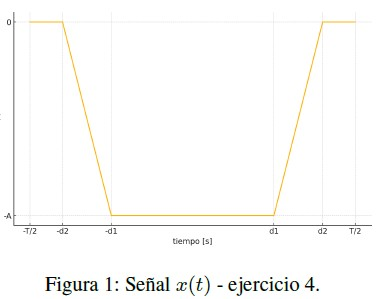

Error relativo reconstrucción desde x''(t): 0.9219
Error relativo reconstrucción desde x(t): 0.5676


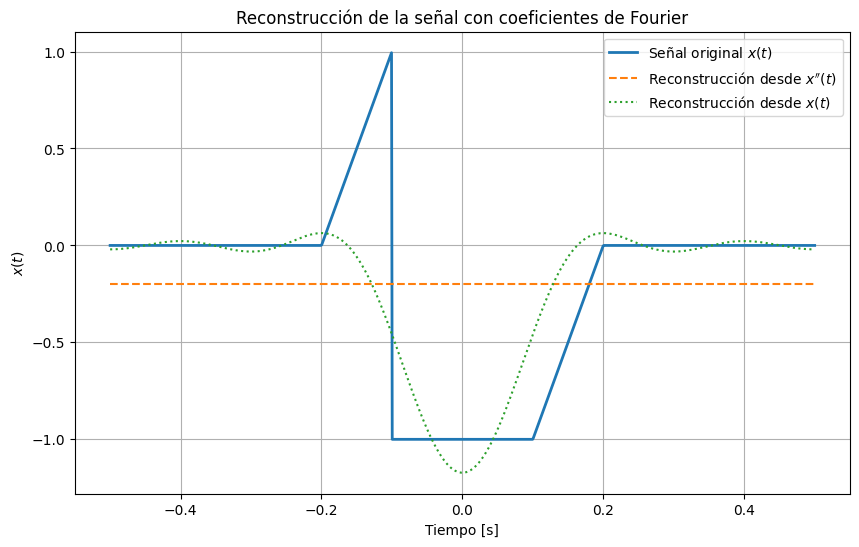

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parámetros
T = 1.0
w0 = 2 * np.pi / T
A = 1.0
d1 = 0.1 * T
d2 = 0.2 * T

# Definición de la señal x(t) según figura (definida a trozos)
def x(t):
    # Adaptar t para periodo [-T/2, T/2]
    t_mod = ((t + T/2) % T) - T/2
    if -T/2 <= t_mod < -d2:
        return 0.0
    elif -d2 <= t_mod < -d1:
        return -A * (t_mod + d2) / (d1 - d2)
    elif -d1 <= t_mod <= d1:
        return -A
    elif d1 < t_mod <= d2:
        return -A * (d2 - t_mod) / (d2 - d1)
    else:
        return 0.0

x_vec = np.vectorize(x)

# Segunda derivada numérica de x(t)
def second_derivative(t, h=1e-5):
    return (x_vec(t + h) - 2*x_vec(t) + x_vec(t - h)) / h**2

# Intervalo
ti, tf = -T/2, T/2

# Coeficiente c_n desde x''(t)
def cn_from_x2(n):
    if n == 0:
        # c0 desde x(t) (promedio)
        integral, _ = quad(x_vec, ti, tf)
        return integral / T
    else:
        integrand = lambda t: second_derivative(t) * np.exp(-1j * n * w0 * t)
        integral, _ = quad(integrand, ti, tf)
        return integral / ((ti - tf) * (n**2) * w0**2)

# Coeficiente c_n desde x(t) (para comparación)
def cn_from_x(n):
    integrand = lambda t: x_vec(t) * np.exp(-1j * n * w0 * t)
    integral, _ = quad(integrand, ti, tf)
    return integral / (tf - ti)

# Valores n
n_vals = np.arange(-5, 6)

# Calcular coeficientes c_n con ambas formas
c_n_x2 = np.array([cn_from_x2(n) for n in n_vals])
c_n_x = np.array([cn_from_x(n) for n in n_vals])

# Función para reconstruir señal con coeficientes c_n
def reconstruct_signal(t, c_n, n_vals):
    suma = np.zeros_like(t, dtype=complex)
    for ci, ni in zip(c_n, n_vals):
        suma += ci * np.exp(1j * ni * w0 * t)
    return suma.real

# Dominio de tiempo para graficar
t_plot = np.linspace(ti, tf, 1000)
x_original = x_vec(t_plot)
x_recon_x2 = reconstruct_signal(t_plot, c_n_x2, n_vals)
x_recon_x = reconstruct_signal(t_plot, c_n_x, n_vals)

# Error relativo de reconstrucción
def relative_error(original, recon):
    return np.linalg.norm(original - recon) / np.linalg.norm(original)

error_x2 = relative_error(x_original, x_recon_x2)
error_x = relative_error(x_original, x_recon_x)

print(f"Error relativo reconstrucción desde x''(t): {error_x2:.4f}")
print(f"Error relativo reconstrucción desde x(t): {error_x:.4f}")

# Graficar señales
plt.figure(figsize=(10,6))
plt.plot(t_plot, x_original, label="Señal original $x(t)$", linewidth=2)
plt.plot(t_plot, x_recon_x2, '--', label="Reconstrucción desde $x''(t)$")
plt.plot(t_plot, x_recon_x, ':', label="Reconstrucción desde $x(t)$")
plt.xlabel("Tiempo [s]")
plt.ylabel("$x(t)$")
plt.title("Reconstrucción de la señal con coeficientes de Fourier")
plt.legend()
plt.grid()
plt.show()



In [15]:
# Graficar espectro (magnitud, fase, parte real e imaginaria)
def plot_spectrum(c_n, n_vals, title_prefix):
    plt.figure(figsize=(12,8))

    plt.subplot(2,2,1)
    plt.stem(n_vals, np.abs(c_n))
    plt.title(f'{title_prefix} - Magnitud $|c_n|$')
    plt.xlabel('$n$')
    plt.grid(True)

    plt.subplot(2,2,2)
    plt.stem(n_vals, np.angle(c_n))
    plt.title(f'{title_prefix} - Fase $\\arg(c_n)$ [rad]')
    plt.xlabel('$n$')
    plt.grid(True)

    plt.subplot(2,2,3)
    plt.stem(n_vals, c_n.real)
    plt.title(f'{title_prefix} - Parte Real')
    plt.xlabel('$n$')
    plt.grid(True)

    plt.subplot(2,2,4)
    plt.stem(n_vals, c_n.imag)
    plt.title(f'{title_prefix} - Parte Imaginaria')
    plt.xlabel('$n$')
    plt.grid(True)

    plt.tight_layout()
    plt.show()



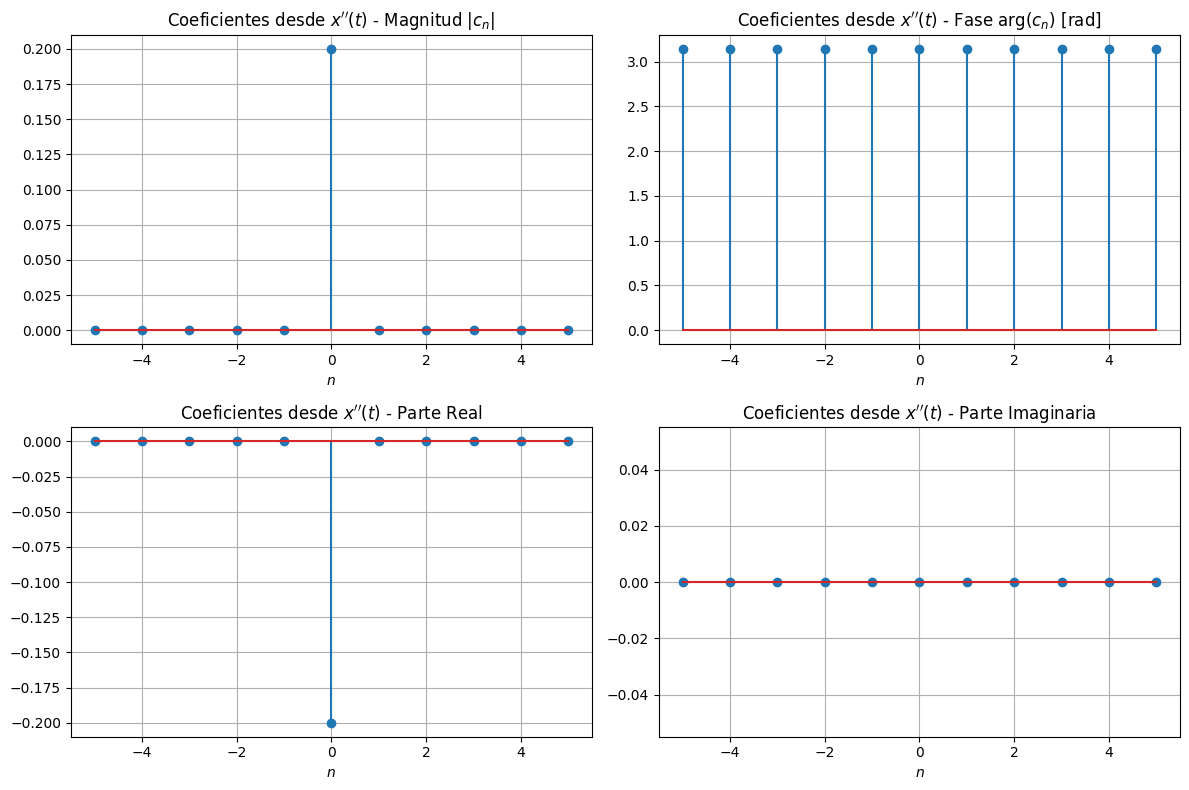

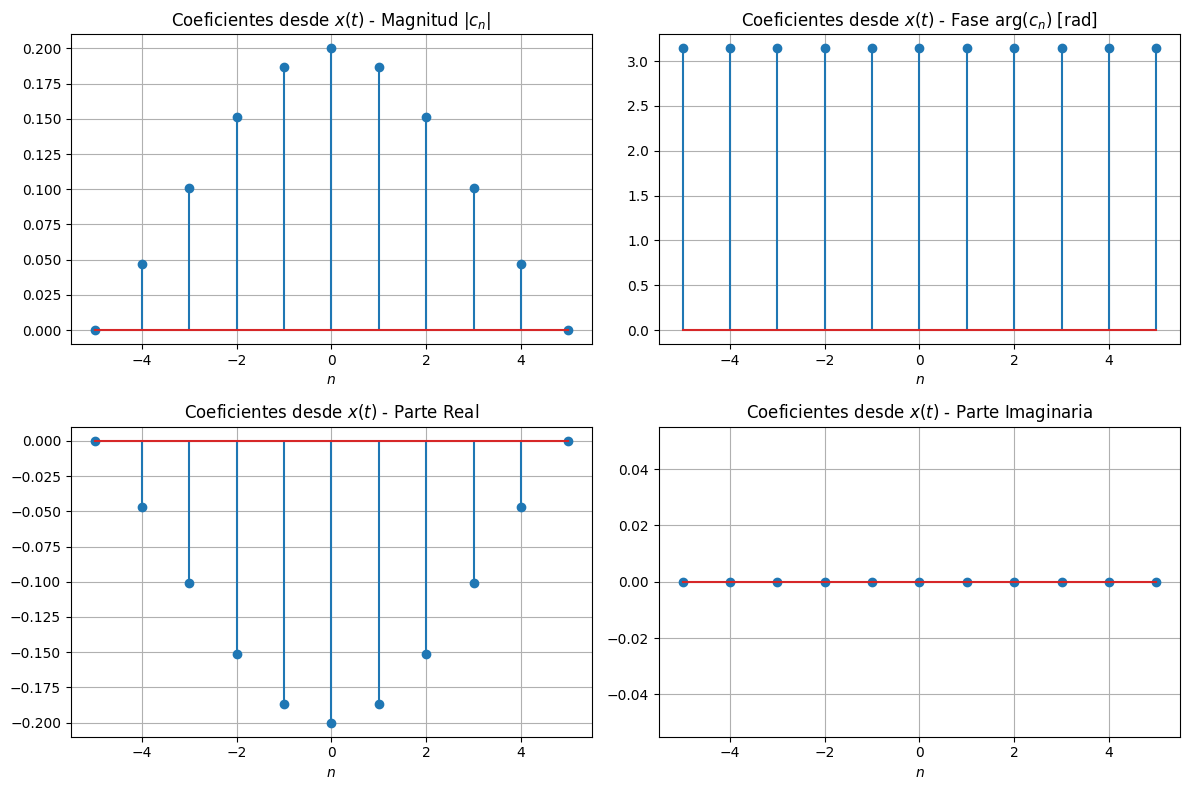

In [16]:
plot_spectrum(c_n_x2, n_vals, "Coeficientes desde $x''(t)$")
plot_spectrum(c_n_x, n_vals, "Coeficientes desde $x(t)$")